In [14]:
s


Filename: primer_cosmos_acswfc_f435w_30mas_sci.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    6152   (26000, 44100)   float32   
  1  HDRTAB        1 BinTableHDU    633   316R x 312C   [9A, 3A, K, D, D, D, D, D, D, D, D, D, D, D, D, D, K, 8A, 9A, 7A, 18A, 4A, D, D, D, D, 3A, D, D, D, D, D, D, D, D, D, D, D, D, K, 8A, 23A, D, D, D, D, K, K, K, 8A, K, 23A, 9A, 20A, K, 4A, K, D, K, K, K, K, 23A, D, D, D, D, K, K, 3A, 3A, 4A, 7A, L, D, D, D, 23A, 1A, K, D, D, D, 13A, 3A, 4A, 4A, 12A, 12A, 23A, 8A, 23A, 10A, 10A, D, D, 3A, 3A, 23A, 4A, 8A, 7A, 23A, D, K, D, 11A, 9A, 8A, D, D, L, 9A, 18A, 3A, K, 7A, 5A, 3A, D, 13A, 8A, 4A, 3A, L, K, L, K, L, K, K, D, D, D, D, D, D, 3A, 1A, D, 23A, D, D, D, 3A, 23A, L, 1A, 3A, 6A, D, 3A, 6A, K, D, D, D, D, D, D, D, D, D, D, 23A, D, D, D, D, 3A, D, D, D, 1A, K, K, K, K, K, K, 23A, K, 5A, 7A, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 13A, D, 24A, 23A, D, 2A, 8A, D, K, D, D, 6A, 13A, D, 20A, K, D

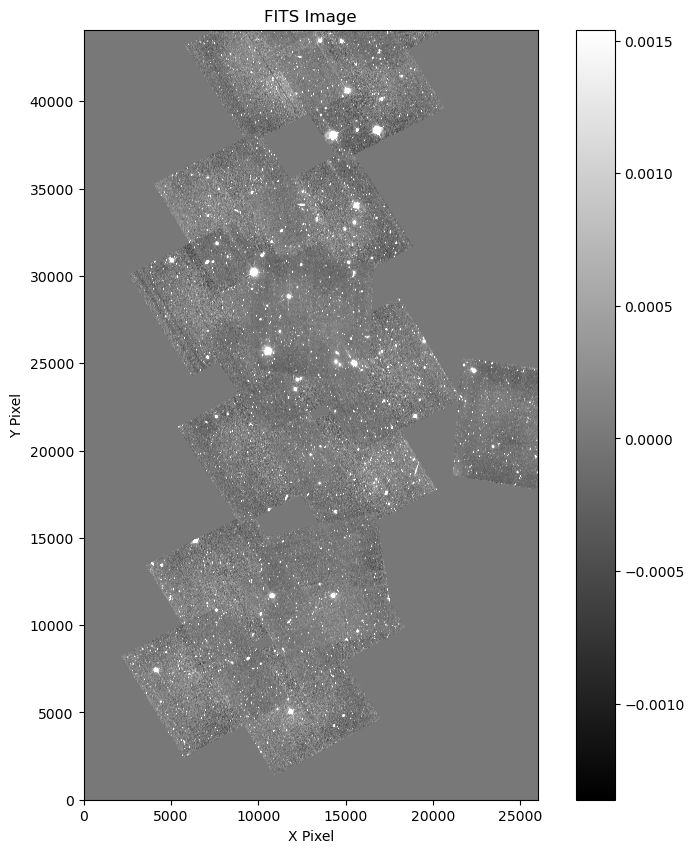

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Compute the percentiles to adjust contrast
vmin = np.percentile(image_data, 5)
vmax = np.percentile(image_data, 95)

# Display the image data
plt.figure(figsize=(10, 10))
plt.imshow(image_data, cmap='gray', origin='lower', vmin=vmin, vmax=vmax)
plt.colorbar()
plt.title('FITS Image')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.show()



In [15]:

# Define some pixel coordinates (for example, the center of the image)
y_center, x_center = np.array(image_data.shape) // 2

# Convert pixel coordinates to world coordinates (RA, Dec)
ra, dec = wcs.all_pix2world(x_center, y_center, 0)
print(f"Pixel coordinates (x, y): ({x_center}, {y_center})")
print(f"World coordinates (RA, Dec): ({ra}, {dec})")

plt.show()

Pixel coordinates (x, y): (13000, 22050)
World coordinates (RA, Dec): (150.12624874658277, 2.330976388888682)


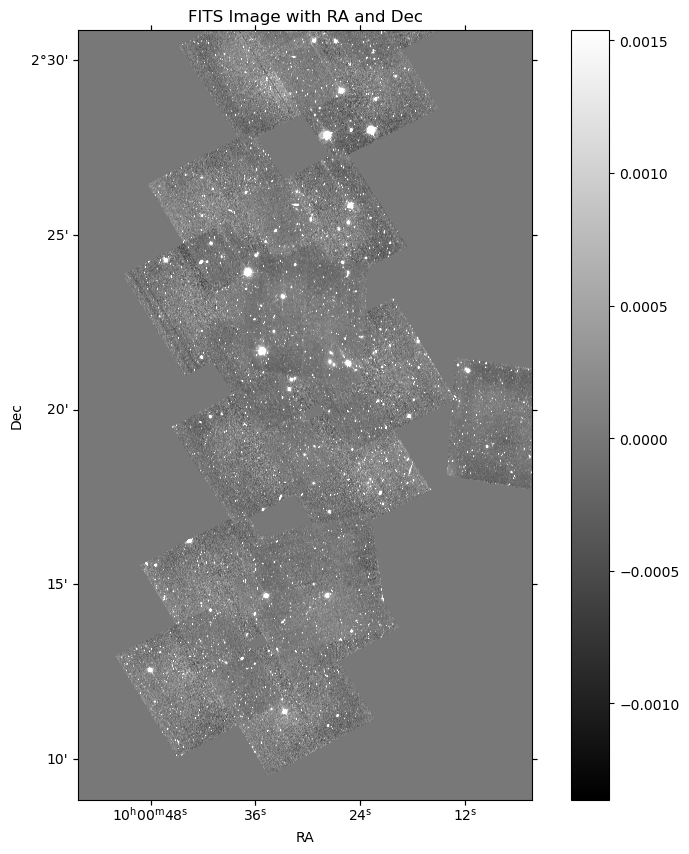

In [16]:
# Create a figure and axis with WCS projection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection=wcs)

# Display the image data with WCS projection
im = ax.imshow(image_data, cmap='gray', origin='lower', vmin=vmin, vmax=vmax)
plt.colorbar(im, ax=ax, orientation='vertical', pad=0.05)
ax.set_xlabel('RA')
ax.set_ylabel('Dec')
ax.set_title('FITS Image with RA and Dec')
plt.show()

In [2]:
table = Table.read('primer_cosmos_acswfc_f435w_30mas_sci.fits.gz', hdu=0)


In [3]:
table


ROOTNAME,EXTNAME,EXTVER,A_0_2,A_0_3,A_0_4,A_1_1,A_1_2,A_1_3,A_2_0,A_2_1,A_2_2,A_3_0,A_3_1,A_4_0,ACQNAME,A_ORDER,APERTURE,ASN_ID,ASN_MTYP,ASN_TAB,ATODCORR,ATODGNA,ATODGNB,ATODGNC,ATODGND,ATODTAB,B_0_2,B_0_3,B_0_4,B_1_1,B_1_2,B_1_3,B_2_0,B_2_1,B_2_2,B_3_0,B_3_1,B_4_0,BADINPDQ,BIASCORR,BIASFILE,BIASLEVA,BIASLEVB,BIASLEVC,BIASLEVD,BINAXIS1,BINAXIS2,BITPIX,BLEVCORR,B_ORDER,BPIXTAB,BUNIT,CAL_VER,CBLKSIZ,CCDAMP,CCDCHIP,CCDGAIN,CCDOFSTA,CCDOFSTB,CCDOFSTC,CCDOFSTD,CCDTAB,CD1_1,CD1_2,CD2_1,CD2_2,CENTERA1,CENTERA2,CFLTFILE,COMPTAB,COMPTYP,CRCORR,CRMASK,CRPIX1,CRPIX2,CRRADIUS,CRREJTAB,CRSIGMAS,CRSPLIT,CRTHRESH,CRVAL1,CRVAL2,CTE_NAME,CTE_VER,CTEDIR,CTEIMAGE,CTYPE1,CTYPE2,D2IMFILE,DARKCORR,DARKFILE,DATE,DATE-OBS,DEC_APER,DEC_TARG,DETECTOR,DFLTFILE,DGEOFILE,DIRIMAGE,DQICORR,DRIZCORR,DRKCFILE,EQUINOX,ERRCNT,EXPEND,EXPFLAG,EXPNAME,EXPSCORR,EXPSTART,EXPTIME,EXTEND,FGSLOCK,FILENAME,FILETYPE,FILLCNT,FILTER1,FILTER2,FLASHCUR,FLASHDUR,FLASHSTA,FLATCORR,FLSHCORR,FLSHFILE,FW1ERROR,FW1OFFST,FW2ERROR,FW2OFFST,FWSERROR,FWSOFFST,GCOUNT,GLINCORR,GLOBLIM,GLOBRATE,GOODMAX,GOODMEAN,GOODMIN,GRAPHTAB,GYROMODE,IDCSCALE,IDCTAB,IDCTHETA,IDCV2REF,IDCV3REF,IMAGETYP,IMPHTTAB,INHERIT,INITGUES,INSTRUME,JWROTYPE,LFLGCORR,LFLTFILE,LINENUM,LOSTPIX,LRC_FAIL,LRC_XSTS,LRFWAVE,LTM1_1,LTM2_2,LTV1,LTV2,MDECODT1,MDECODT2,MDRIZSKY,MDRIZTAB,MEANBLEV,MEANDARK,MEANEXP,MEANFLSH,MLINTAB,MOFFSET1,MOFFSET2,MOONANGL,MTFLAG,NAXIS,NAXIS1,NAXIS2,NCOMBINE,NEXTEND,NGOODPIX,NPOLFILE,NRPTEXP,OBSMODE,OBSTYPE,OCD1_1,OCD1_2,OCD2_1,OCD2_2,OCRPIX1,OCRPIX2,OCRVAL1,OCRVAL2,OCTYPE1,OCTYPE2,OCX10,OCX11,OCY10,OCY11,ONAXIS1,ONAXIS2,OORIENTA,OPUS_VER,ORIENTAT,ORIGIN,OSCNTAB,P1_ANGLE,P1_CENTR,P1_FRAME,P1_LSPAC,P1_NPTS,P1_ORINT,P1_PSPAC,P1_PURPS,P1_SHAPE,PA_APER,PATTERN1,PATTSTEP,PA_V3,PCOUNT,PCTECORR,PCTEFRAC,PCTENSMD,PCTERNCL,PCTESHFT,PCTESMIT,PCTETAB,PFLTFILE,PHOTBW,PHOTCORR,PHOTFLAM,PHOTMODE,PHOTPLAM,PHOTTAB,PHOTZPT,PODPSFF,POSTARG1,POSTARG2,PRIMESI,PR_INV_F,PR_INV_L,PR_INV_M,PROCTIME,PROPAPER,PROPOSID,QUALCOM1,QUALCOM2,QUALCOM3,QUALITY,RA_APER,RA_TARG,READNSEA,READNSEB,READNSEC,READNSED,REFFRAME,REJ_RATE,RPTCORR,SCALENSE,SCLAMP,SDQFLAGS,SHADCORR,SHADFILE,SHUTRPOS,SIMPLE,SIZAXIS1,SIZAXIS2,SKYSUB,SKYSUM,SNRMAX,SNRMEAN,SNRMIN,SOFTERRS,SPOTTAB,STATFLAG,STDCFFF,STDCFFP,SUBARRAY,SUN_ALT,SUNANGLE,TARGNAME,TDDALPHA,TDDBETA,TELESCOP,TIME-OBS,T_SGSTAR,VAFACTOR,WCSAXES,WCSCDATE,WFCMPRSD,WCSNAME,WRTERR,XTENSION,WCSNAMEO,WCSAXESO,LONPOLEO,LATPOLEO,RESTFRQO,RESTWAVO,CD1_1O,CD1_2O,CD2_1O,CD2_2O,CDELT1O,CDELT2O,CRPIX1O,CRPIX2O,CRVAL1O,CRVAL2O,CTYPE1O,CTYPE2O,CUNIT1O,CUNIT2O
bytes9,bytes3,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,bytes8,bytes9,bytes7,bytes18,bytes4,float64,float64,float64,float64,bytes3,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,bytes8,bytes23,float64,float64,float64,float64,int64,int64,int64,bytes8,int64,bytes23,bytes9,bytes20,int64,bytes4,int64,float64,int64,int64,int64,int64,bytes23,float64,float64,float64,float64,int64,int64,bytes3,bytes3,bytes4,bytes7,bool,float64,float64,float64,bytes23,bytes1,int64,float64,float64,float64,bytes13,bytes3,bytes4,bytes4,bytes12,bytes12,bytes23,bytes8,bytes23,bytes10,bytes10,float64,float64,bytes3,bytes3,bytes23,bytes4,bytes8,bytes7,bytes23,float64,int64,float64,bytes11,bytes9,bytes8,float64,float64,bool,bytes9,bytes18,bytes3,int64,bytes7,bytes5,bytes3,float64,bytes13,bytes8,bytes4,bytes3,bool,int64,bool,int64,bool,int64,int64,float64,float64,float64,float64,float64,float64,bytes3,bytes1,float64,bytes23,float64,float64,float64,bytes3,bytes23,bool,bytes1,bytes3,bytes6,float64,bytes3,bytes6,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes23,float64,float64,float64,float64,bytes3,float64,float64,float64,bytes1,int64,int64,int64,int64,int64,int64,bytes23,int64,bytes5,bytes7,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float

In [6]:
from astropy.io import fits
import numpy as np
from astropy.wcs import WCS

# Extract and print WCS-related information
wcs_keywords = ['CTYPE1', 'CRVAL1', 'CRPIX1', 'CUNIT1', 'CTYPE2', 'CRVAL2', 'CRPIX2', 'CUNIT2']
for keyword in wcs_keywords:
    if keyword in primary_header:
        print(f"{keyword}: {primary_header[keyword]}")

# Close the FITS file
hdul.close()

CTYPE1: RA---TAN
CRVAL1: 150.1262529167
CRPIX1: 13000.5
CUNIT1: deg
CTYPE2: DEC--TAN
CRVAL2: 2.330972222222
CRPIX2: 22050.5
CUNIT2: deg


In [18]:
from numpy import loadtxt
im26_data = loadtxt('im26_data.csv', delimiter=',')

In [19]:
im26_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
image_data 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)